<a href="https://colab.research.google.com/github/weipengten/ISSS623GroupProject--Applied-Healthcare-/blob/main/Healthcare_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISSS623 Group Project

# Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the excel file
url = 'https://raw.githubusercontent.com/weipengten/ISSS623GroupProject--Applied-Healthcare-/main/CARES_data.xlsx'
df = pd.read_excel(url, index_col='Indexno')

print(df.shape)
df.head()

(90785, 31)


,AGE,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,GradeofKidneydisease,DaysbetweenDeathandoperation,@30daymortality,Preoptransfusionwithin30days,Intraop,...,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,Anemiacategorybinned,RDW15.7,ASAcategorybinned,ICUAdmgt24h
Indexno,,,,,,,,,,,,,,,,,,,,,
2,48,FEMALE,NaN,NaN,NaN,BLANK,NaN,NO,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,no,#NULL!,#NULL!,#NULL!,I,no
5,36,FEMALE,NaN,none,NaN,BLANK,NaN,NO,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,<= 15.7,I,no
6,64,FEMALE,NaN,mild,152.538570,g1,NaN,NO,0,0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,G1,Mild,<= 15.7,I,no
9,73,MALE,NaN,moderate,117.231496,g1,NaN,NO,0,1,...,#NULL!,#NULL!,#NULL!,#NULL!,no,G1,Moderate/Severe,<= 15.7,I,no
10,73,MALE,0.0,mild,98.651255,g1,59.0,NO,0,0,...,no,no,no,no,no,G1,Mild,>15.7,II,no


# Data Cleaning

1. Replace missing values with nan

2. Replace strings with lowercase

3. Replace ' ' with  '_'

4. Create bins for AGE as age_bins

5. Drop rows with at least 10 missing values in columns,  93.73% remaining

In [ ]:
# replace missing values with pd.NA
null_values = ['#NULL!', 'BLANK', 'none', 'NA', '<NA>', 'None']
df.replace(null_values, np.nan, inplace=True)

# check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90785 entries, 2 to 121200
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   AGE                                90785 non-null  int64  
 1   GENDER                             90785 non-null  object 
 2   RCRI score                         63361 non-null  float64
 3   Anemia category                    23869 non-null  object 
 4   PreopEGFRMDRD                      79955 non-null  float64
 5   GradeofKidneydisease               79955 non-null  object 
 6   DaysbetweenDeathandoperation       5595 non-null   float64
 7   @30daymortality                    90785 non-null  object 
 8   Preoptransfusionwithin30days       90785 non-null  int64  
 9   Intraop                            90785 non-null  int64  
 10  Postopwithin30days                 90785 non-null  int64  
 11  Transfusionintraandpostop          90785 non-null  int64  

In [ ]:
# statistical summary
df.describe()

,AGE,RCRI score,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop
count,90785.000000,63361.000000,79955.000000,5595.000000,90785.000000,90785.000000,90785.000000,90785.000000
mean,52.253225,0.322296,96.426155,476.782127,0.042672,0.056276,0.018946,0.075222
std,17.087307,0.634789,33.954241,421.866740,0.405840,0.230455,0.260728,0.395623
min,18.000000,0.000000,2.541026,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,79.078715,121.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,96.398561,355.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,1.000000,114.310169,746.000000,0.000000,0.000000,0.000000,0.000000
max,103.000000,6.000000,671.298147,1783.000000,21.000000,1.000000,23.000000,24.000000


In [ ]:
# replace all column names with lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# replace all string values in the DataFrame with lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [ ]:
# check potential duplicates
df.duplicated().sum()

# We will not drop duplicates in this dataste as
# they represent multiple legitimate entries representing different patients

12205

In [ ]:
# find all unique values for categorical features
for column in df.select_dtypes(include=['object']).columns:
    print(f'{column}: {df[column].unique()}')

gender: ['female' 'male']
anemia_category: [nan 'mild' 'moderate' 'severe']
gradeofkidneydisease: [nan 'g1' 'g2' 'g5' 'g3b' 'g3a' 'g4']
@30daymortality: ['no' 'yes']
anaestypecategory: ['ga' 'ra']
prioritycategory: ['elective' 'emergency']
transfusionintraandpostopcategory: ['0 units' '1 unit' '2 or more units']
agecategory: ['30-49' '50-64' '65-74' '75-84' '18-29' '>=85']
agecategoryoriginal: ['30-49' '50-69' '>=70' '18-29']
mortality: ['no death' 'yes']
thirtydaymortality: ['no' 'yes']
surgriskcategory: ['low' 'moderate' 'high']
racecategory: ['chinese' 'indian' 'others' 'malay' nan]
cvarcricategory: [nan 'no' 'yes']
ihdrcricategory: [nan 'no' 'yes']
chfrcricategory: [nan 'no' 'yes']
dminsulinrcricategory: [nan 'no' 'yes']
creatininercricategory: ['no' nan 'yes']
gradeofkidneycategory: [nan 'g1' 'g2' 'g4-g5' 'g3']
anemiacategorybinned: [nan 'mild' 'moderate/severe']
rdw15.7: [nan '<= 15.7' '>15.7']
asacategorybinned: ['i' 'ii' 'iii' 'iv-vi' nan]
icuadmgt24h: ['no' 'yes']


age_binned
0-10           0
11-20       1127
21-30       9925
31-40      12931
41-50      14147
51-60      18155
61-70      19205
71-80      11465
81-90       3469
91-100       356
101-110        5
Name: count, dtype: int64 



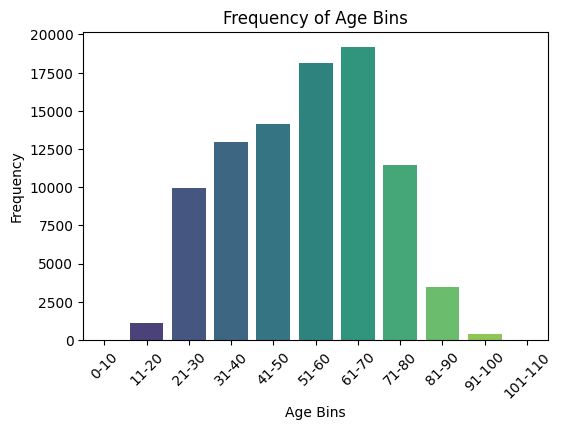

In [ ]:
# bin the age column
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110']
df['age_binned'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# summarize frequency counts
age_binned_counts = df['age_binned'].value_counts().sort_index()
print(age_binned_counts, '\n')
plt.figure(figsize=(6, 4))
sns.barplot(x=age_binned_counts.index, y=age_binned_counts.values, palette="viridis")
plt.xlabel('Age Bins')
plt.ylabel('Frequency')
plt.title('Frequency of Age Bins')
plt.xticks(rotation=45)
plt.show()

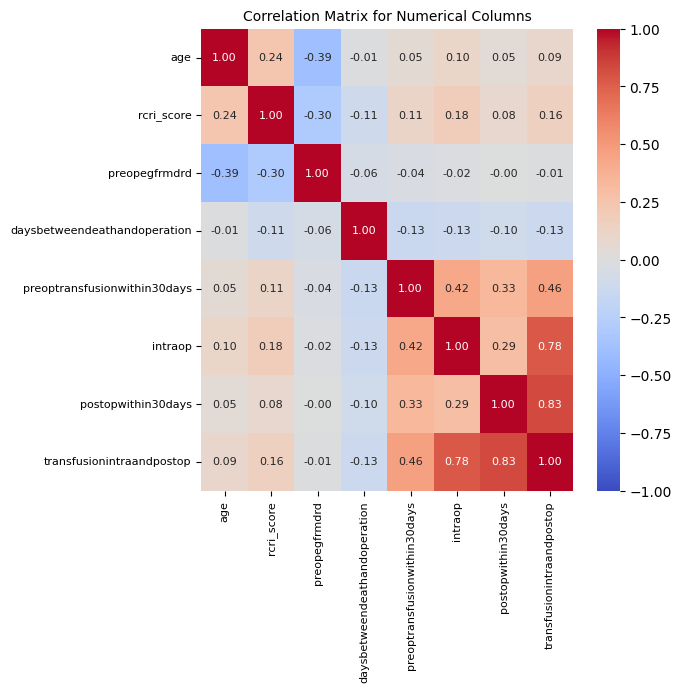

In [ ]:
# visualize correlation for numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()
fontsize=8
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, cbar=True, annot_kws={'size': 8})
plt.title('Correlation Matrix for Numerical Columns', fontsize=10)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.show()

In [ ]:
# drop rows with at least X missing values and display the percentage of rows that remain

# define the threshold for missing values
threshold = 10
missing_counts = df.isna().sum(axis=1)

# Calculate the percentage of rows to keep
percentage_remaining = round((df[missing_counts < threshold].shape[0] / df.shape[0]) * 100, 2)
print(f"Percentage of rows with fewer than {threshold} missing values: {percentage_remaining}%")

# Drop rows with at least the specified number of missing values
df = df[missing_counts < threshold]
df.head()

Percentage of rows with fewer than 10 missing values: 93.73%


,age,gender,rcri_score,anemia_category,preopegfrmdrd,gradeofkidneydisease,daysbetweendeathandoperation,@30daymortality,preoptransfusionwithin30days,intraop,...,ihdrcricategory,chfrcricategory,dminsulinrcricategory,creatininercricategory,gradeofkidneycategory,anemiacategorybinned,rdw15.7,asacategorybinned,icuadmgt24h,age_binned
Indexno,,,,,,,,,,,,,,,,,,,,,
6,64,female,NaN,mild,152.538570,g1,NaN,no,0,0,...,NaN,NaN,NaN,NaN,g1,mild,<= 15.7,i,no,61-70
9,73,male,NaN,moderate,117.231496,g1,NaN,no,0,1,...,NaN,NaN,NaN,no,g1,moderate/severe,<= 15.7,i,no,71-80
10,73,male,0.0,mild,98.651255,g1,59.0,no,0,0,...,no,no,no,no,g1,mild,>15.7,ii,no,71-80
11,55,male,NaN,NaN,104.487306,g1,NaN,no,0,0,...,NaN,NaN,NaN,NaN,g1,NaN,<= 15.7,i,no,51-60
13,48,female,NaN,NaN,72.669742,g2,NaN,no,0,0,...,NaN,NaN,NaN,NaN,g2,NaN,<= 15.7,ii,no,41-50


Numerical columns: Index(['age', 'rcri_score', 'preopegfrmdrd', 'daysbetweendeathandoperation',
       'preoptransfusionwithin30days', 'intraop', 'postopwithin30days',
       'transfusionintraandpostop'],
      dtype='object')


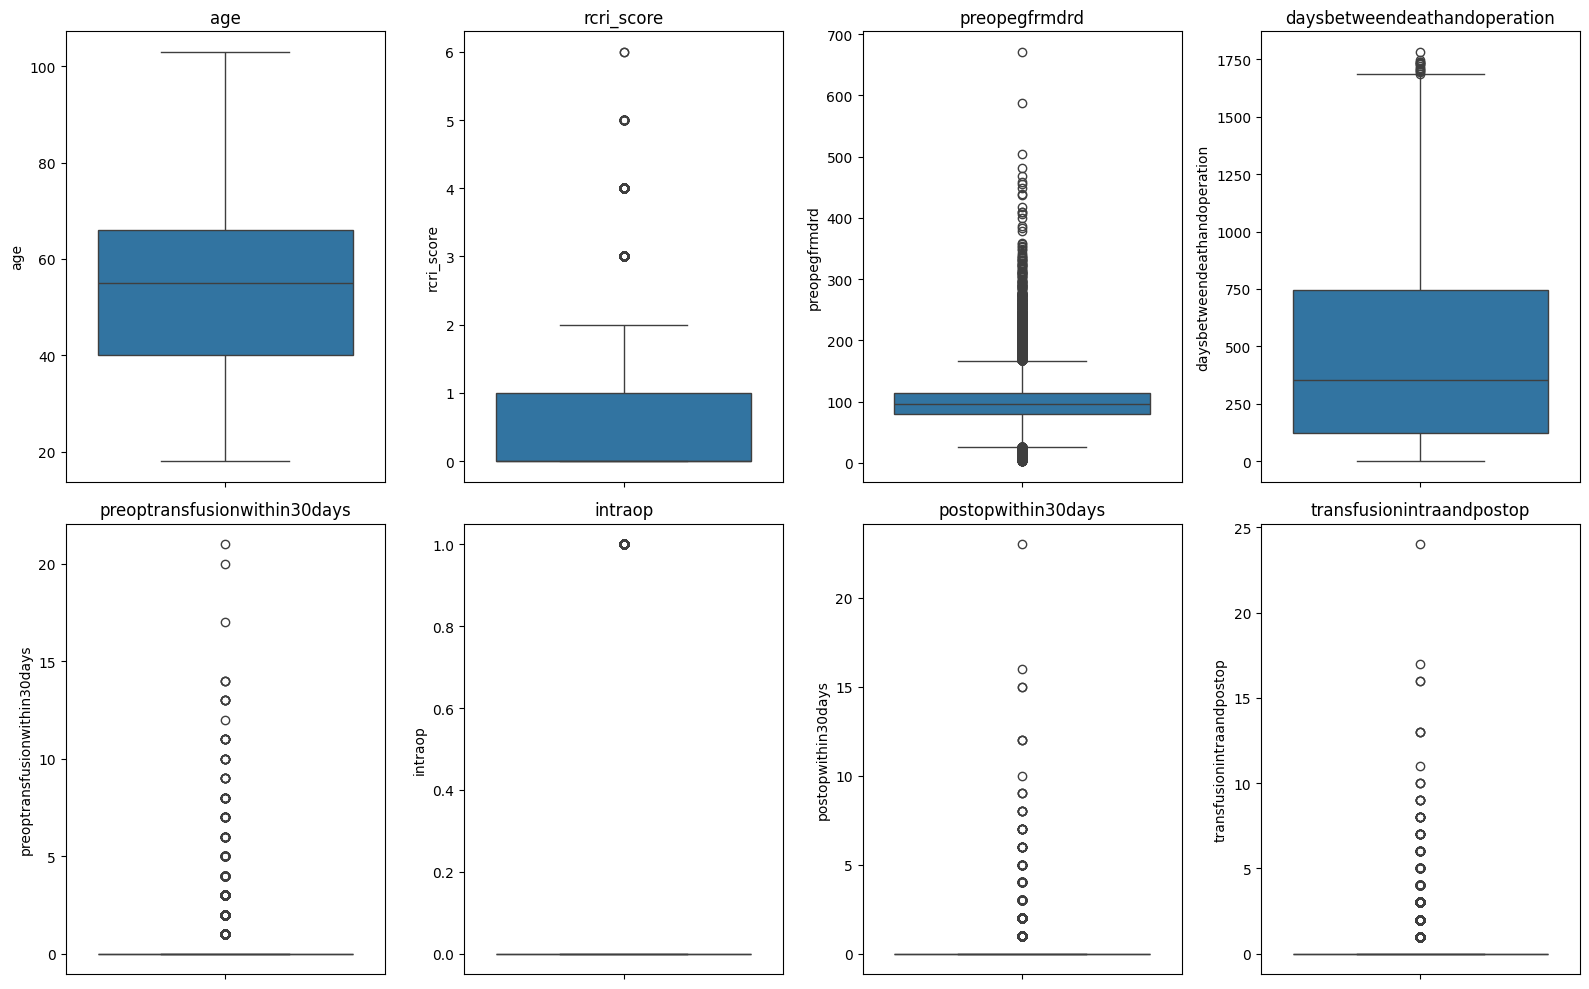

In [ ]:
# outlier detection for numerical features
numerical_columns = df.select_dtypes(include=['number']).columns
print("Numerical columns:", numerical_columns)

plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()